In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
BnkDta = pd.read_csv('BankDataFinal.csv')

In [4]:
BnkDta.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,housing,loan,day_interval,age,balance,duration,campaign,pdays,previous,y
0,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0.519481,0.092259,0.053070,0.0,0.0,0.0,0
1,0,0,0,0,0,0,0,0,0,1,...,1,0,1,0.337662,0.073067,0.030704,0.0,0.0,0.0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,1,1,0.194805,0.072822,0.015453,0.0,0.0,0.0,0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0.376623,0.086476,0.018707,0.0,0.0,0.0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0.194805,0.072812,0.040260,0.0,0.0,0.0,0


In [5]:
X = BnkDta[BnkDta.columns.difference(['y'])]
y = BnkDta['y']

In [6]:
X.columns

Index(['age', 'balance', 'campaign', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'day_interval', 'default', 'duration',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'housing', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'loan', 'marital_divorced',
       'marital_married', 'marital_single', 'month', 'pdays',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'previous'],
      dtype='object')

In [7]:
#from sklearn.cross_validation import StratifiedKFold
#skf = StratifiedKFold(y, n_folds=2) #2-fold cross validation
#len(skf)

In [8]:
#for train_index, test_index in skf:
 #   print("TRAIN:", train_index, "TEST:", test_index)
  #  X_train, X_test = X[train_index], X[test_index]
   # y_train, y_test = y[train_index], y[test_index]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.3, random_state=0)

# Feature Importance

Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

In [11]:
from sklearn.ensemble import ExtraTreesClassifier
# feature extraction
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
print(model.feature_importances_)

[0.10125137 0.10607607 0.06639403 0.00979107 0.0051189  0.01289266
 0.0479367  0.00353012 0.24728952 0.00647113 0.00970897 0.00932864
 0.00537976 0.02650716 0.00939701 0.00884813 0.00478381 0.00432735
 0.009606   0.00719335 0.00516081 0.00775538 0.00514263 0.00989166
 0.00594399 0.00173622 0.0135483  0.00661235 0.00794164 0.00655929
 0.09716055 0.02720325 0.01023771 0.00684399 0.04810961 0.02020547
 0.01811539]


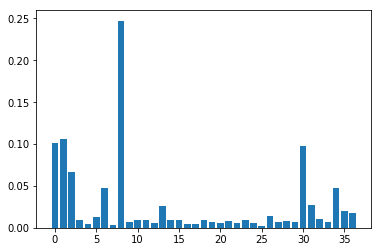

In [15]:
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

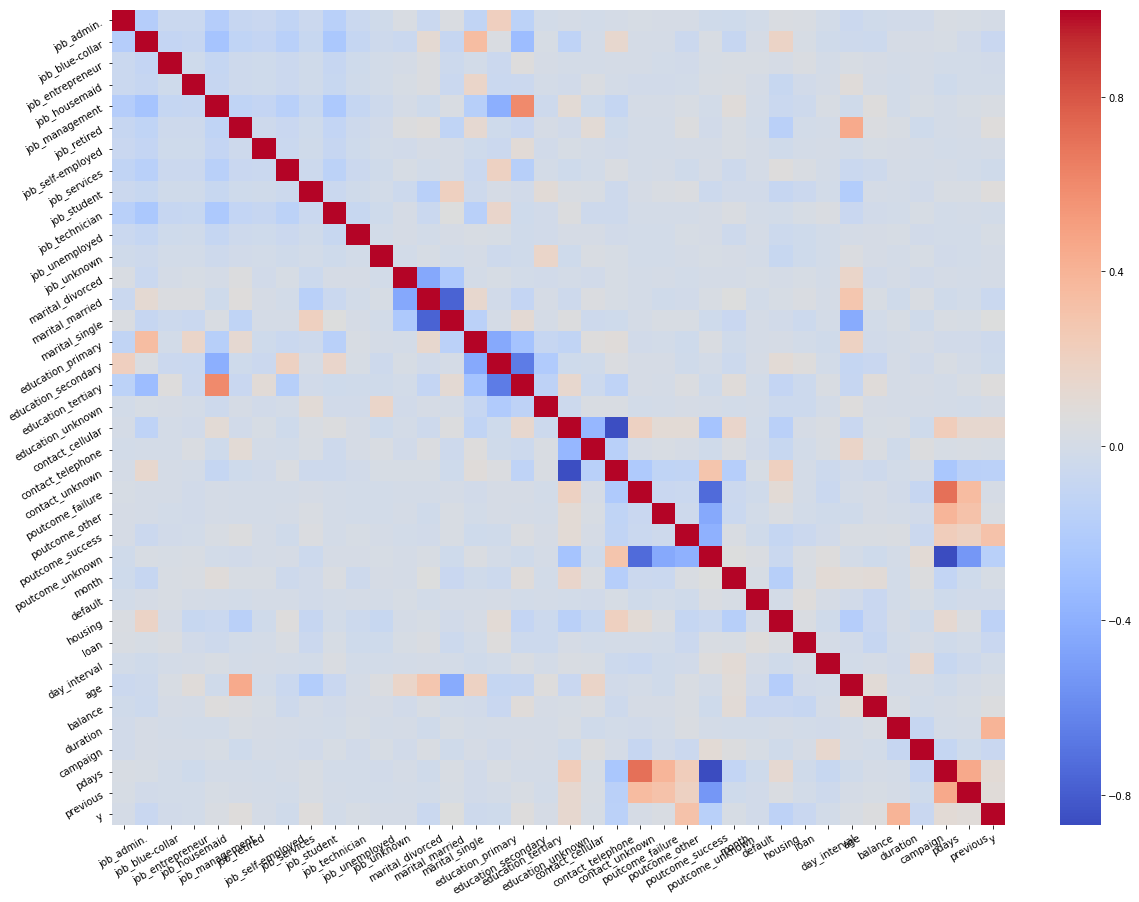

In [78]:

plt.subplots(figsize=(20,15))

s=sns.heatmap(BnkDta.corr(),cmap='coolwarm') # fantastic tool to study the features 
s.set_yticklabels(s.get_yticklabels(),rotation=30,fontsize=10)
s.set_xticklabels(s.get_xticklabels(),rotation=30,fontsize=10)
plt.show()


# Feature importance with XGboost

In [1]:
from xgboost import XGBClassifier

In [12]:
# fit model no training data
XGB = XGBClassifier()
XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [13]:
print(XGB.feature_importances_)

[0.06160459 0.04441261 0.02148997 0.01432665 0.         0.05014327
 0.03868195 0.00143266 0.2636103  0.00573066 0.         0.01002865
 0.00143266 0.04154728 0.00286533 0.00859599 0.         0.
 0.         0.         0.         0.         0.00143266 0.
 0.00286533 0.         0.02148997 0.         0.01575931 0.00286533
 0.21203439 0.10458453 0.         0.         0.05873926 0.
 0.01432665]


In [17]:
from xgboost import plot_importance

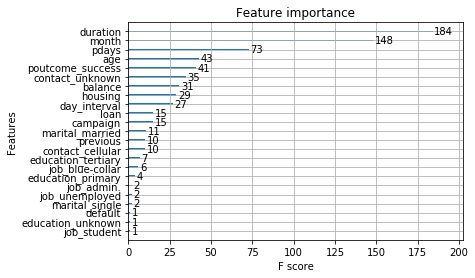

In [19]:
# plot feature importance
plot_importance(XGB)
plt.show()

We can employ those scores to select the most useful features!with SelectFromModel in scikit-learn which takes a model and can transform a dataset into a subset with selected features based on importance weights.

In [26]:
from numpy import sort
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
# Fit model using each importance as a threshold
thresholds = sort(XGB.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(XGB, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    roc = roc_auc_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, ROC: %.2f%%" % (thresh, select_X_train.shape[1], roc*100.0))

Thresh=0.000, n=37, ROC: 66.92%
Thresh=0.000, n=37, ROC: 66.92%
Thresh=0.000, n=37, ROC: 66.92%
Thresh=0.000, n=37, ROC: 66.92%
Thresh=0.000, n=37, ROC: 66.92%
Thresh=0.000, n=37, ROC: 66.92%
Thresh=0.000, n=37, ROC: 66.92%
Thresh=0.000, n=37, ROC: 66.92%
Thresh=0.000, n=37, ROC: 66.92%
Thresh=0.000, n=37, ROC: 66.92%
Thresh=0.000, n=37, ROC: 66.92%
Thresh=0.000, n=37, ROC: 66.92%
Thresh=0.000, n=37, ROC: 66.92%
Thresh=0.000, n=37, ROC: 66.92%
Thresh=0.001, n=23, ROC: 66.92%
Thresh=0.001, n=23, ROC: 66.92%
Thresh=0.001, n=23, ROC: 66.92%
Thresh=0.003, n=20, ROC: 66.98%
Thresh=0.003, n=20, ROC: 66.98%
Thresh=0.003, n=20, ROC: 66.98%
Thresh=0.006, n=17, ROC: 66.90%
Thresh=0.009, n=16, ROC: 67.33%
Thresh=0.010, n=15, ROC: 67.21%
Thresh=0.014, n=14, ROC: 67.66%
Thresh=0.014, n=14, ROC: 67.66%
Thresh=0.016, n=12, ROC: 67.48%
Thresh=0.021, n=11, ROC: 67.31%
Thresh=0.021, n=11, ROC: 67.31%
Thresh=0.039, n=9, ROC: 67.39%
Thresh=0.042, n=8, ROC: 66.95%
Thresh=0.044, n=7, ROC: 67.08%
Thresh=0.05

# Comparing Different Feature-selection Techniques

# Univariate Selection

We can take advantage of some common statistical tests to select those features that may have an important impact on the prediction process! In this section, " ANOVA F-value" is employed to select the best features from the dataset.


In [27]:
from sklearn.feature_selection import SelectKBest, f_classif, RFE

In [28]:
# feature extraction
tst = SelectKBest(score_func= f_classif, k=30)
fit = tst.fit(X_train, y_train)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[2.088e+01 8.477e+01 1.648e+02 5.915e+02 7.571e+00 7.404e+02 2.907e+00
 1.228e+01 5.850e+03 4.886e+01 4.271e+01 1.370e+02 4.539e+00 5.910e+02
 1.293e+00 1.620e+02 1.477e+01 6.905e+00 4.123e+01 1.954e+02 2.163e-01
 2.070e+01 1.770e+02 7.478e+00 1.385e+01 4.691e-01 1.494e+02 6.561e-02
 1.030e+02 1.178e+02 9.197e+00 3.555e+02 3.800e+00 3.849e+01 3.222e+03
 9.116e+02 2.455e+02]
[[0.519 0.092 0.    0.    0.    1.    0.    0.053 0.    0.    1.    1.
  0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    1.    0.
  5.    0.    0.    0.    1.    0.   ]
 [0.338 0.073 0.    0.    0.    1.    0.    0.031 0.    1.    0.    1.
  0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.    1.
  5.    0.    0.    0.    1.    0.   ]
 [0.195 0.073 0.    0.    0.    1.    0.    0.015 0.    1.    0.    1.
  0.    1.    0.    0.    0.    0.    0.    0.    0.    1.    1.    0.
  5.    0.    0.    0.    1.    0.   ]
 [0.377 0.086 0.    0.    0.    1.    0.    0.019 0.    0.    0.    1.
  1.    0

# Recursive Feature Elimination

The Recursive Feature Elimination (RFE) works by recursively removing attributes and building a model on those attributes that remain. In this section, we use Decision Tree algorithm to select the most important features.

In [29]:
# feature extraction
mdl = XGBClassifier()
rfe = RFE(mdl, 20)
fit = rfe.fit(X_train, y_train)

print("Num Features: %d" % (fit.n_features_,))
#print(X.columns)
print("Selected Features: %s" % (fit.support_,))
print("Feature Ranking: %s" % (fit.ranking_,))
dic = {'Feature': X.columns ,'Rank':fit.ranking_ }
#Feature_RNK= pd.DataFrame(data=dic)

Num Features: 20
Selected Features: [ True  True  True  True False  True  True False  True  True False  True
 False  True  True  True False False False False False False False False
  True False  True False  True  True  True  True False False  True False
  True]
Feature Ranking: [ 1  1  1  1  7  1  1  4  1  1  5  1  3  1  1  1 15 17 18 16 14  8  2 12
  1  9  1 10  1  1  1  1 11 13  1  6  1]


In [30]:
Feature_RNK= pd.DataFrame(data=dic)
Feature_RNK

,Feature,Rank
0,age,1
1,balance,1
2,campaign,1
3,contact_cellular,1
4,contact_telephone,7
5,contact_unknown,1
6,day_interval,1
7,default,4
8,duration,1
9,education_primary,1


In [33]:
SelectedFeats=X.columns[fit.support_]
SelectedFeats

Index(['age', 'balance', 'campaign', 'contact_cellular', 'contact_unknown',
       'day_interval', 'duration', 'education_primary', 'education_tertiary',
       'housing', 'job_admin.', 'job_blue-collar', 'job_unemployed', 'loan',
       'marital_married', 'marital_single', 'month', 'pdays',
       'poutcome_success', 'previous'],
      dtype='object')

In [34]:
X_train1=X_train[SelectedFeats]
X_test1=X_test[SelectedFeats]

In [35]:
print(X_train1.shape)
print(X_test1.shape)


(31647, 20)
(13564, 20)


In [36]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train1, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'.format(gnb.score(X_train1, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'.format(gnb.score(X_test1, y_test)))

Accuracy of GNB classifier on training set: 0.88
Accuracy of GNB classifier on test set: 0.87


In [37]:
preds_gnb = gnb.predict(X_test1)

In [38]:
roc_gnb = roc_auc_score(y_test, preds_gnb)
print(roc_gnb)

0.6906865548171277


Let's go back to our Naieve Bayes model with all features presented!

In [39]:
gnbwithAllfeats = GaussianNB()
gnbwithAllfeats.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'.format(gnbwithAllfeats.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'.format(gnbwithAllfeats.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.81
Accuracy of GNB classifier on test set: 0.81


In [41]:
preds_gnb2 = gnbwithAllfeats.predict(X_test)

In [42]:
roc_gnb2 = roc_auc_score(y_test, preds_gnb2)
print(roc_gnb2)

0.6942471495066237


Check the performance again wih XGboost again after sticking with 20 features only

In [43]:
XGB2 = XGBClassifier()
XGB2.fit(X_train1, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [45]:
preds_XGB2 = XGB2.predict(X_test1)

In [46]:
roc_XGB2 = roc_auc_score(y_test,preds_XGB2)
print(roc_XGB2)

0.6698389146304834


We have very slight improvement in the performance of the model (we go roc_auc_score of 0.66922 with XGboost with all feaures presented)

# Principal Component Analysis

In [61]:
from sklearn.decomposition import PCA
pca = PCA(0.95) # create a PCA object
pca.fit(X_train) # do the math
pca_data = pca.transform(X_train) # get PCA coordinates for scaled_data

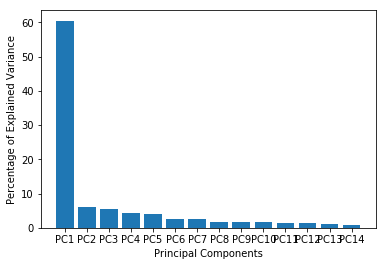

In [67]:
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
fig=plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.show()
 

We can confirm that most of the variation along with the first principal component(PC1)

Text(0,0.5,'Second Principal Component')

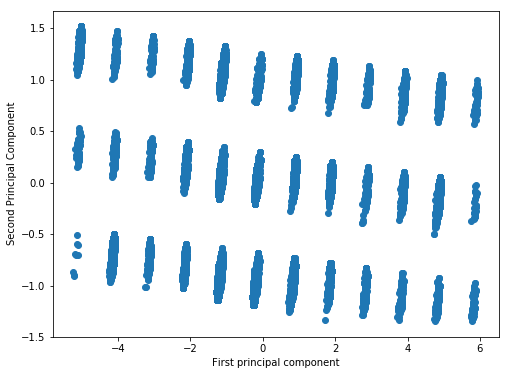

In [81]:
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0],pca_data[:,1],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [59]:
## get the name of the top 10 features that contribute most to pc1.
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0])

## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the top 10 predictors!
top_15 = sorted_loading_scores[0:15].index.values
 
print(loading_scores[top_15])

30    0.996507
6     0.038591
5    -0.036633
13   -0.036597
3     0.032971
11    0.016946
15   -0.016565
29   -0.014612
28    0.013908
18    0.013826
10   -0.010795
35    0.010231
23    0.007535
32   -0.006970
0     0.005749
dtype: float64


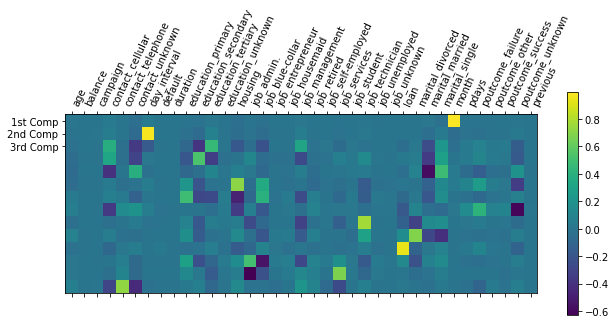

In [68]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2],['1st Comp','2nd Comp','3rd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(X.columns)),X.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 